In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import missingno as mno
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [172]:
# Charger les données
Pima_DF = pd.read_csv('pima_data.csv', names = ['#G', 'Gly', 'PSD', 'MG','Ins','IMC','Risk', 'Age', 'Label'])
#Afficher les informations de mon dataset
Pima_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #G      768 non-null    int64  
 1   Gly     768 non-null    int64  
 2   PSD     768 non-null    int64  
 3   MG      768 non-null    int64  
 4   Ins     768 non-null    int64  
 5   IMC     768 non-null    float64
 6   Risk    768 non-null    float64
 7   Age     768 non-null    int64  
 8   Label   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


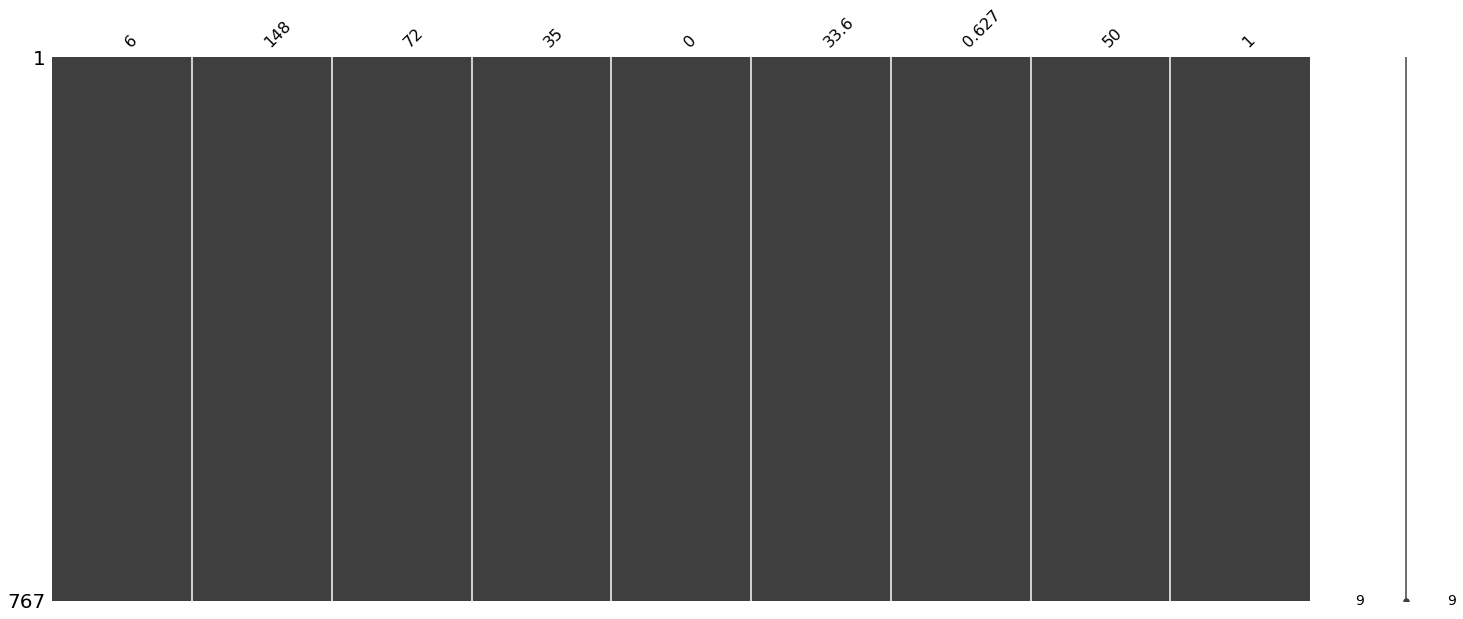

In [6]:
mno.matrix(Pima_DF);

In [173]:

Pima_DF.head()

,#G,Gly,PSD,MG,Ins,IMC,Risk,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,-1
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#normalisons notre jeu de données
#verification des valeurs manquantes
def check_missing_value(Pima_DF):
    return Pima_DF.isnull().sum()

In [5]:
#supprimer des valeurs manquantes s'il en existe
def drop_missing_value(Pima_DF):
    return Pima_DF.dropna(inplace =True)

In [8]:
#decoupage de mon jeu de données en deux parties
#X: variable expliqué
#y: variables a expliquer / etiquettes
X = Pima_DF.drop(['Label'], axis=1)
Y = Pima_DF['Label']

In [75]:
#train_test_split : fonction de decoupage en jeu de données d'apprentissage et jeu de données test en deux partie egale
X_1, X_2, Y_1, Y_2 = train_test_split(X, Y, test_size=0.5)

In [10]:
#je cree un standardiseur scaler
scaler = StandardScaler()

In [11]:
#apprentissage des parametres de mon standardiseur sur mon jeu de données d'entrainement X_1
scaler.fit(X_1)

StandardScaler()

In [10]:
X_1

,#G,Gly,PSD,MG,Ins,IMC,Risk,Age
482,0,84,82,31,125,38.2,0.233,23
263,4,123,62,0,0,32.0,0.226,35
631,2,111,60,0,0,26.2,0.343,23
62,2,141,58,34,128,25.4,0.699,24
746,1,81,74,41,57,46.3,1.096,32
...,...,...,...,...,...,...,...,...
243,2,146,76,35,194,38.2,0.329,29
755,7,137,90,41,0,32.0,0.391,39
236,0,179,90,27,0,44.1,0.686,23
324,1,157,72,21,168,25.6,0.123,24


In [12]:
#normalisation de mon jeu de données X_1
X_1_normalise=scaler.transform(X_1)

In [13]:
#Affichage de mon jeu de données normalisé
X_1_normalise

array([[-0.49202921,  0.14737271, -1.14655823, ...,  0.27737732,
        -0.88279066, -0.88071407],
       [ 0.74775492, -1.12531607,  0.55841851, ..., -1.08805504,
        -1.16325998, -0.04515923],
       [-0.49202921, -0.13898227,  0.55841851, ...,  1.31364295,
         0.69332501, -0.96426955],
       ...,
       [ 0.43780889, -0.39352002, -0.04333799, ..., -0.74669695,
        -0.52915542, -0.2122702 ],
       [-0.18208318, -1.02986441,  0.45812576, ...,  1.28926023,
         0.28481534, -0.96426955],
       [-1.11192128, -0.93441275, -0.44450899, ...,  0.38709956,
        -0.61756423, -0.63004762]])

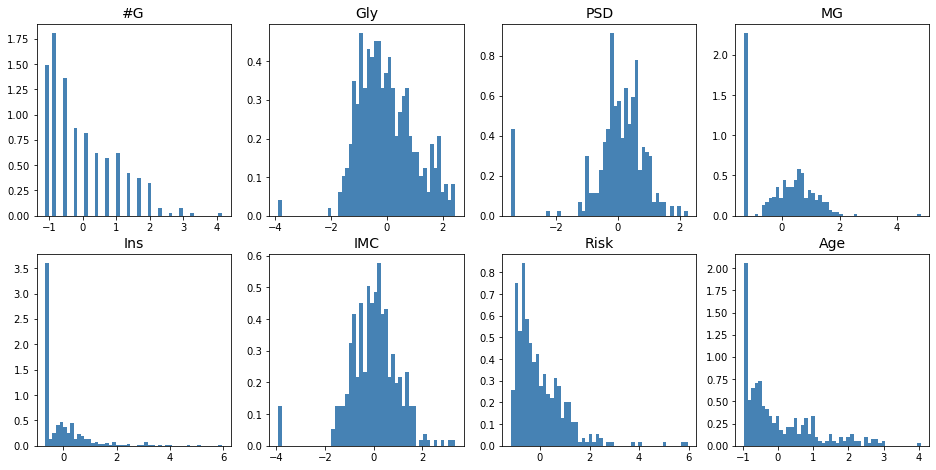

In [73]:
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_1_normalise.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_1_normalise[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(Pima_DF.columns[feat_idx], fontsize=14)


In [14]:
#normalisation de mon jeu de données X_2
X_2_normalise=scaler.transform(X_2)

In [15]:
#Affichage de mon jeu de données normalisé X_2
X_2_normalise

array([[-0.49202921, -0.48897168,  0.25754026, ...,  0.17984644,
        -0.1877145 , -0.79715858],
       [-0.80197524,  1.29279261,  0.15724751, ...,  0.8381799 ,
         2.30602364,  0.03839625],
       [ 0.12786285, -0.39352002,  0.35783301, ..., -0.4541043 ,
        -1.05960828, -0.46293665],
       ...,
       [ 2.29748508, -0.3617028 ,  0.759004  , ...,  1.78910601,
         1.40059549,  1.04106206],
       [ 2.60743111, -0.96622997, -0.34421624, ..., -0.55163518,
         1.40364407,  0.95750657],
       [ 0.12786285, -0.23443392,  0.15724751, ..., -0.3931475 ,
        -0.27307473,  1.12461754]])

In [16]:
#classification avec knn=5
neigh5 = KNeighborsClassifier(n_neighbors=5)

In [17]:
neigh5.fit(X_1_normalise, Y_1)

KNeighborsClassifier()

In [18]:
#classification avec knn = 15
neigh15 = KNeighborsClassifier(n_neighbors=15)

In [19]:
neigh15.fit(X_1_normalise, Y_1)

KNeighborsClassifier(n_neighbors=15)

In [20]:
#mesure du score d'apprentissage du jeu de données x_1_normalisé et y_1 pour k=5
neigh5.score(X_2_normalise, Y_2)

0.7213541666666666

In [21]:
#mesure du score d'apprentissage du jeu de données x_1_normalisé et y_1 pour k=15
neigh15.score(X_2_normalise, Y_2)

0.7447916666666666

In [24]:
y_pred = neigh5.predict(X_2_normalise)

In [25]:
y_pred

array([-1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1,  1, -1

In [27]:
accuracy_score(Y_2, y_pred)

0.7213541666666666

In [31]:
print(classification_report(Y_2, y_pred))

              precision    recall  f1-score   support

          -1       0.75      0.84      0.80       247
           1       0.64      0.50      0.56       137

    accuracy                           0.72       384
   macro avg       0.70      0.67      0.68       384
weighted avg       0.71      0.72      0.71       384



In [32]:
y_pred15 = neigh15.predict(X_2_normalise)

In [34]:
y_pred15

array([-1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
        1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1

In [35]:
accuracy_score(Y_2, y_pred15)

0.7447916666666666

In [38]:
roc_auc_score(Y_2, y_pred)

0.6728774490971956

In [166]:
roc_auc_score(Y_2, y_pred15)

0.5267762460233298

In [162]:
confusion_matrix(Y_2, y_pred)

array([[182,  64],
       [ 94,  44]], dtype=int64)

In [167]:
confusion_matrix(Y_2, y_pred15)

array([[195,  51],
       [102,  36]], dtype=int64)

Text(0, 0.5, 'Sensibilite')

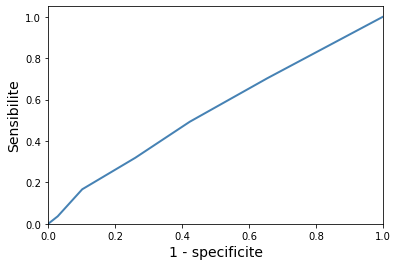

In [169]:
y_roc_neigh5 = neigh5.predict_proba(X_2_normalise)[:, 1]
[fpr, tpr, thr] = roc_curve(Y_2, y_roc_neigh5)
plt.plot(fpr, tpr, color='steelblue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

Text(0, 0.5, 'Sensibilite')

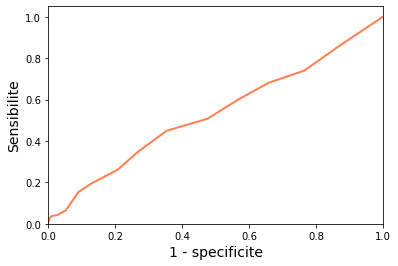

In [168]:
y_roc_neigh15 = neigh15.predict_proba(X_2_normalise)[:, 1]
[fpr, tpr, thr] = roc_curve(Y_2, y_roc_neigh15)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14)
plt.ylabel('Sensibilite', fontsize=14)

# Parie 2


# Strategie 1 : ensemble d’apprentissage, de validation et de test

In [39]:
#S1.1
#train_test_split
X_av, X_t, Y_av, Y_t = train_test_split(X, Y, test_size=0.5)

In [41]:
p_k = [1, 5, 10, 15, 20, 25]

### Strategie 1.2

In [45]:
#S1.2
X_a, X_v, Y_a, Y_v = train_test_split(X_av, Y_av, test_size=0.6)

In [46]:
# normalisation de jeu de données (X_a, Y_a), (X_v Y_v) et (X_t, Y_t) 
scandler2 = StandardScaler()

In [47]:
scandler2.fit(X_a)

StandardScaler()

In [48]:
X_a

,#G,Gly,PSD,MG,Ins,IMC,Risk,Age
184,7,194,68,28,0,35.9,0.745,41
274,2,100,70,52,57,40.5,0.677,25
100,1,151,60,0,0,26.1,0.179,22
390,5,166,76,0,0,45.7,0.340,27
681,0,95,64,39,105,44.6,0.366,22
...,...,...,...,...,...,...,...,...
343,8,95,72,0,0,36.8,0.485,57
683,5,136,82,0,0,0.0,0.640,69
624,4,90,88,47,54,37.7,0.362,29
727,2,175,88,0,0,22.9,0.326,22


In [49]:
X_a_normalisé=scandler2.transform(X_a)

In [50]:
X_a_normalisé

array([[ 1.01512118,  2.31581226, -0.02398569, ...,  0.51779579,
         0.79200819,  0.81407575],
       [-0.4811557 , -0.75528151,  0.0839499 , ...,  1.09079056,
         0.58603261, -0.61245069],
       [-0.78041108,  0.91095022, -0.45572804, ..., -0.7029322 ,
        -0.92243564, -0.87992439],
       ...,
       [ 0.11735505, -1.08199361,  1.05537019, ...,  0.74201113,
        -0.36811899, -0.25581908],
       [-0.4811557 ,  1.69505926,  1.05537019, ..., -1.10153726,
        -0.47716489, -0.87992439],
       [-1.07966646, -0.06918609, -0.13192127, ...,  0.31849326,
        -0.84973837,  0.10081253]])

In [52]:
X_v_normalisé = scandler2.transform(X_v)

In [54]:
X_v_normalisé

array([[-1.07966646, -0.7226103 , -0.18588907, ..., -0.88977832,
        -0.74675058, -0.87992439],
       [ 1.01512118,  0.45355327,  1.16330578, ...,  0.03199587,
        -0.28027646,  0.63575994],
       [-1.07966646,  0.48622448, -3.69379568, ...,  0.56762142,
         1.3614701 , -0.61245069],
       ...,
       [ 0.7158658 , -0.68993909,  0.73156343, ..., -0.11748103,
        -0.91940658,  0.36828624],
       [ 1.61363193,  0.71492296,  1.05537019, ..., -0.17976307,
         0.87076356,  1.88397058],
       [-0.78041108,  0.2248548 ,  0.0839499 , ..., -0.72784502,
        -0.0349232 , -0.87992439]])

In [53]:
X_t_normalisé = scandler2.transform(X_t)

In [55]:
X_t_normalisé

array([[-0.18190033, -1.31069208, -0.56366363, ...,  0.31849326,
        -0.44687436, -0.61245069],
       [ 0.41661043,  2.08711379,  0.40775667, ...,  1.47693921,
         1.66740442,  1.88397058],
       [ 1.61363193, -0.68993909,  0.40775667, ...,  0.14410354,
         0.54968397,  1.25986526],
       ...,
       [-0.4811557 , -1.34336329, -0.88747039, ..., -0.40397841,
         3.68172446, -0.61245069],
       [-0.4811557 ,  0.74759417,  0.40775667, ...,  0.80429317,
        -0.46807773, -0.25581908],
       [ 0.11735505,  0.06149875,  0.0839499 , ..., -0.35415278,
         2.00060021,  1.17070736]])

In [ ]:
#s1.3 Application de l'algorithme k_nn pour chaque valeur de P_K puis evaluer l'erreur en apprentissage et en validation

In [144]:
Erreur_A = []
Erreur_V = []
for i in p_k:
    #je crée un objet KNeighborsClassifier pour chaque valeur de i
    neigh = KNeighborsClassifier(n_neighbors=i)
    # apprentissage des parametres de mon objet sur mon jeu de données d'entrainement X_a
    neigh.fit(X_a_normalisé, Y_a)
    # je mesure mon score d'apprentissage sur mes données test
    score_A = neigh.score(X_t_normalisé, Y_t)
    # je mesure mon score d'apprentissage sur mes données de validation
    score_V = neigh.score(X_v_normalisé, Y_v)
    Erreur_A.append(score_A)
    Erreur_V.append(score_V)
    #print(Erreur_A)
    #print(Erreur_V)

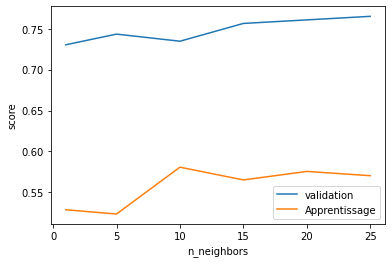

In [154]:
#graphic
plt.plot(p_k, Erreur_V, label='validation')
plt.plot(p_k, Erreur_A, label='Apprentissage')

plt.ylabel('score')
plt.xlabel('n_neighbors')

plt.legend()

In [ ]:
# En interpretation mon model je vois l'erreur minimale est optenu avec k=5 

In [158]:
#Evaluation de l'erreur de test pour K=5
neighbors5 = KNeighborsClassifier(n_neighbors=5)
neighbors5.fit(X_a_normalisé, Y_a)
score_E_test = neighbors5.score(X_t_normalisé, Y_t)

In [159]:
print(score_E_test)

0.5234375


# Strategie 2 : validation-croisée pour la séléction de  k.

In [122]:
#rappelle des valeurs de P_K
p_k = [1, 5, 10, 15, 20, 25]

#S2.1
#Normalisons les valeurs mes jeux de donnees (X_av, Y_av) et (X_t, Y_t) selon le principe decrit dans la partie 1

In [123]:
#train_test_split
X_av, X_t, Y_av, Y_t = train_test_split(X, Y, test_size=0.5)

In [124]:
#creation de mon standardiseur
scaler3 = StandardScaler()

In [125]:
scaler3.fit(X_av)

StandardScaler()

In [126]:
#transformer le jeu d'entrainement en lui appliquant le scaler
X_av_normalisé=scaler3.transform(X_av)

In [127]:
X_av_normalisé

array([[-0.53593614, -0.32033147,  1.20648001, ...,  1.34266132,
         1.1846157 ,  1.8269452 ],
       [-0.53593614,  0.31799815,  0.25840373, ...,  0.15188639,
         0.37239605, -0.69253336],
       [ 0.07045542, -1.37357534, -0.37364712, ...,  0.25216218,
        -0.26714697, -0.69253336],
       ...,
       [ 1.88963009,  1.33932554, -0.05762169, ..., -0.81326802,
        -0.47499846,  1.2187952 ],
       [ 2.19282587, -1.08632701,  0.25840373, ..., -0.23668227,
        -0.55813905,  0.17625235],
       [ 1.28323853, -1.4374083 ,  0.04772011, ...,  0.41511033,
         0.73693558,  0.52376663]])

In [128]:
X_t_normalise2 = scaler3.transform(X_t)

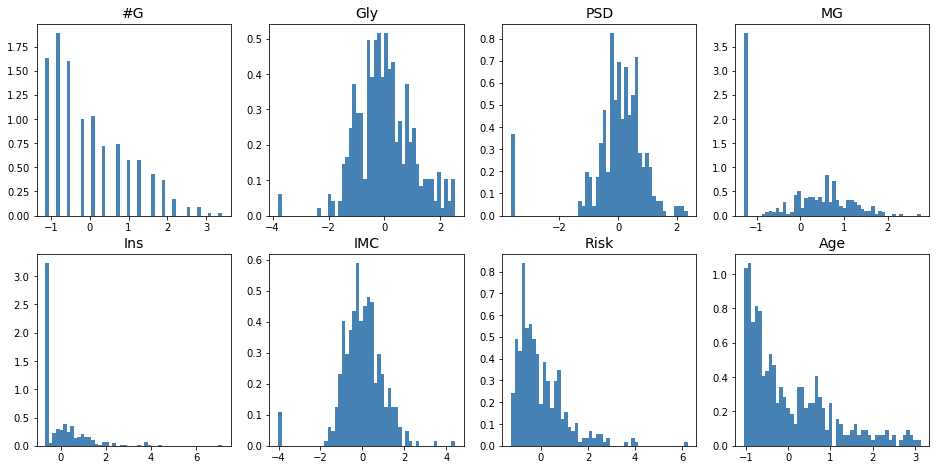

In [130]:
#visualisation de la distribution des variable standardisées standardisées
fig = plt.figure(figsize=(16, 12))
for feat_idx in range(X_av_normalisé.shape[1]):
    ax = fig.add_subplot(3,4, (feat_idx+1))
    h = ax.hist(X_av_normalisé[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(Pima_DF.columns[feat_idx], fontsize=14)

###### l'ensemble de reference est (X_av, Y_av)

In [150]:
#S2.2 Construire construire k=5 sous ensemble
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25],
             'metric' : ['euclidean', 'manhattan']}
# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

In [151]:
# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur k_NN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [152]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_av_normalisé, Y_av)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [153]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'metric': 'manhattan', 'n_neighbors': 15}


In [137]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


Résultats de la validation croisée :
accuracy = 0.668 (+/-0.080) for {'n_neighbors': 1}
accuracy = 0.676 (+/-0.083) for {'n_neighbors': 5}
accuracy = 0.721 (+/-0.094) for {'n_neighbors': 10}
accuracy = 0.721 (+/-0.102) for {'n_neighbors': 15}
accuracy = 0.710 (+/-0.070) for {'n_neighbors': 20}
accuracy = 0.726 (+/-0.035) for {'n_neighbors': 25}


La meilleure performance (~0.726) est ici atteinte avec 25 voisins.

In [160]:
#commenter les resultats

In [171]:
#la performance sur le jeu de test
y_pred_test = clf.predict(X_t_normalise2)
print("\nSur le jeu de test : {:.3f}".format(metrics.accuracy_score(Y_t, y_pred_test)))



Sur le jeu de test : 0.760


### Partie 3 : EXERCICE NOTE